In [1]:
import pandas as pd

# Load the data
data_nodata = pd.read_csv("gdb9_G4MP2_nodata_hydrogenation.csv")

# Display the first few rows
data_nodata.head()


,Unnamed: 0,Unsaturated_SMILES,Saturated_SMILES,nH2,pH2
0,0,C#N,CN,2,12.986516
1,1,CC#N,CCN,2,8.946943
2,2,NC=O,NCO,1,4.285233
3,3,CC(N)=O,CC(N)O,1,3.301489
4,4,NC(N)=O,NC(N)O,1,3.248533


In [2]:
data_nodata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80752 entries, 0 to 80751
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          80752 non-null  int64  
 1   Unsaturated_SMILES  80752 non-null  object 
 2   Saturated_SMILES    80752 non-null  object 
 3   nH2                 80752 non-null  int64  
 4   pH2                 80752 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.1+ MB


In [27]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors as MolDescriptors

# Load the dataset
df = pd.read_csv("gdb9_G4MP2_nodata_hydrogenation.csv")
def count_6_membered_aromatic_rings(smiles):
    mol = Chem.MolFromSmiles(smiles)
    aromatic_rings = 0
    for ring in Chem.GetSymmSSSR(mol):
        if len(ring) == 6 and all([mol.GetAtomWithIdx(atom_idx).GetIsAromatic() for atom_idx in ring]):
            aromatic_rings += 1
    return aromatic_rings

# Apply the function to the Unsaturated_SMILES column
df['num_6_aromatic_rings'] = df['Unsaturated_SMILES'].apply(count_6_membered_aromatic_rings)

# Count the number of molecules with at least one 6-membered aromatic ring
num_molecules_with_6_aromatic_rings = len(df[df['num_6_aromatic_rings'] > 0])

print(f"Number of molecules with 6-membered aromatic rings: {num_molecules_with_6_aromatic_rings}")


Number of molecules with 6-membered aromatic rings: 5863


In [28]:
# Filter the dataframe
filtered_df = df[df['num_6_aromatic_rings'] > 0]

# Extract the Unsaturated_SMILES values
unsaturated_smiles_with_aromatic_rings = filtered_df['Unsaturated_SMILES'].values

# Convert to a list, if needed
unsaturated_smiles_list = list(unsaturated_smiles_with_aromatic_rings)

# Display the result
print(unsaturated_smiles_list)


['C1=CC=NC=C1', 'C1=CN=CC=N1', 'C1=CN=CN=C1', 'C1=NC=NC=N1', 'C1=CN=NC=C1', 'C1=CN=NN=C1', 'C1=NN=CN=N1', 'C1=NN=NC=N1', 'C1=NN=NN=C1', 'O=C1C=CNC=C1', 'O=C1C=CNC=N1', 'O=C1C=COC=N1', 'O=C1N=COC=N1', 'N=C1OC=CC=C1', 'N=C1OC=CC=N1', 'N=C1OC=CN=C1', 'N=C1OC=NC=C1', 'N=C1OC=NC=N1', 'O=C1NC=CC=C1', 'O=C1NC=CC=N1', 'O=C1NC=CN=C1', 'O=C1NC=NC=C1', 'O=C1NC=NC=N1', 'O=C1OC=CC=C1', 'O=C1OC=CC=N1', 'O=C1OC=CN=C1', 'O=C1OC=NC=C1', 'O=C1OC=NC=N1', 'CC1=CC=NC=C1', 'CC1=CN=CC=C1', 'CC1=CN=CC=N1', 'CC1=CN=CN=C1', 'CC1=NC=CC=C1', 'CC1=NC=CC=N1', 'CC1=NC=CN=C1', 'CC1=NC=NC=C1', 'NC1=CC=CC=C1', 'NC1=CN=CC=C1', 'NC1=CN=CC=N1', 'NC1=CN=CN=C1', 'NC1=NC=CC=C1', 'NC1=NC=CC=N1', 'NC1=NC=CN=C1', 'NC1=NC=NC=C1', 'NC1=NC=NC=N1', 'OC1=CC=NC=C1', 'OC1=CN=CC=C1', 'OC1=CN=CC=N1', 'OC1=CN=CN=C1', 'OC1=NC=CC=C1', 'OC1=NC=CC=N1', 'OC1=NC=CN=C1', 'OC1=NC=NC=C1', 'OC1=NC=NC=N1', 'CC1=CN=CN=N1', 'CC1=CN=NC=N1', 'CC1=CN=NN=N1', 'CC1=NC=CN=N1', 'CC1=NC=NN=N1', 'N=C1C=CNN=N1', 'N=C1C=CON=C1', 'N=C1C=CON=N1', 'N=C1C=NNN=C1', 

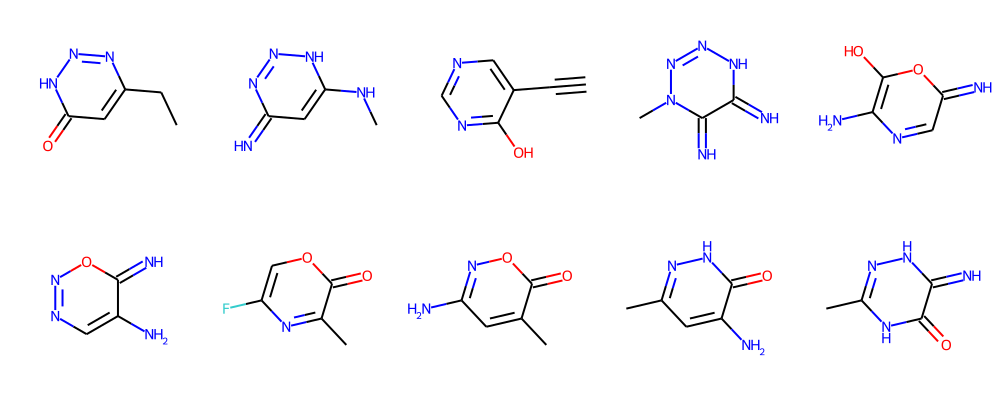

In [29]:
import random
from rdkit.Chem import Draw

# Randomly select 10 SMILES strings
random_smiles = random.sample(unsaturated_smiles_list, 10)

# Convert the SMILES strings to Mol objects
molecules = [Chem.MolFromSmiles(smile) for smile in random_smiles]

# Draw the molecules
img = Draw.MolsToGridImage(molecules, molsPerRow=5, subImgSize=(200,200))
img


In [30]:
unsaturated_smiles_without_F = [smiles for smiles in unsaturated_smiles_list if 'F' not in smiles]
print (len(unsaturated_smiles_without_F))

4388


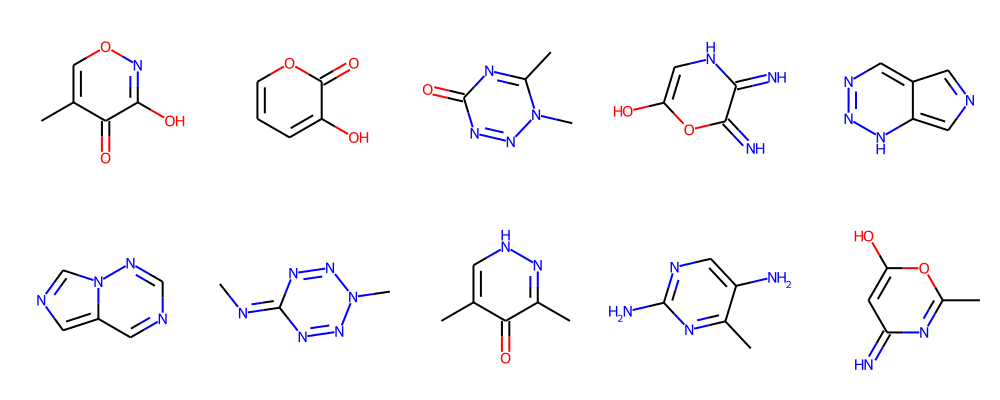

In [31]:
import random
from rdkit.Chem import Draw

# Randomly select 10 SMILES strings
random_smiles = random.sample(unsaturated_smiles_without_F, 10)

# Convert the SMILES strings to Mol objects
molecules = [Chem.MolFromSmiles(smile) for smile in random_smiles]

# Draw the molecules
img = Draw.MolsToGridImage(molecules, molsPerRow=5, subImgSize=(200,200))
img


In [33]:
# First, filter the dataframe
filtered_df = df[df['pH2'] > 5.5]

In [34]:
filtered_df

,Unnamed: 0,Unsaturated_SMILES,Saturated_SMILES,nH2,pH2,num_6_aromatic_rings
0,0,C#N,CN,2,12.986516,0
1,1,CC#N,CCN,2,8.946943,0
5,5,C#CC#N,CCCN,4,13.648422,0
6,6,N#CC#N,NCCN,4,13.422288,0
7,7,O=CC#C,OCCC,3,10.068599,0
...,...,...,...,...,...,...
80570,80570,FC1=NC=C(N=N1)C#N,FC1NCC(NN1)CN,5,7.515655,1
80645,80645,FC(F)(F)C(C#C)C#C,FC(F)(F)C(CC)CC,4,5.755658,0
80646,80646,FC(F)(F)C(C#C)C#N,FC(F)(F)C(CC)CN,4,5.715054,0
80690,80690,FC(F)(F)CC#CC#C,FC(F)(F)CCCCC,4,5.755658,0


In [35]:
# Drop the num_6_aromatic_rings column
filtered_df = filtered_df.drop(columns=['num_6_aromatic_rings'])


In [37]:
# Save the modified dataframe to a new CSV file
filtered_df.to_csv('gdb9_G4MP2_nodata_hydrogenation_h2wt55.csv', index=False)



In [38]:
!pwd


/Users/hassan/Desktop/Projects/ML_hydrogenation
